In [4]:
!pip install accelerate datasets evaluate tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 20.0 MB/s eta 0:00:00


In [1]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 8.3 MB/s eta 0:00:00


In [2]:
!pip install transformers==4.45.2 sentence-transformers==3.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [5]:
import re
import string
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
import evaluate
import transformers
import torch
import emoji
import os
from peft import LoraConfig, get_peft_model
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset
from transformers import DataCollatorWithPadding
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    EarlyStoppingCallback)


In [6]:
np.random.seed(0)

In [7]:
data_train = pd.read_csv('/content/drive/MyDrive/Znatno_personal/Отчетность ВКР/Артефакты/Parsing_avito/Model for benchmark/data/train - train (3).csv')

In [8]:
data_train = data_train.drop(columns=['Unnamed: 0'])

In [ ]:
data_train

,message.text,Оценка
0,Сестринское дело (1991). Перевоспитание (2020)...,2
1,"Не указано, Опыт работы: 0,5 года, Компания: К...",2
2,"Коммуникабельный, стрессоустойчивый и пунктуал...",2
3,Косметолог с опытом работы в салоне. Мне нрави...,2
4,"**Обязанности:** * Чистка лица (механическая, ...",2
...,...,...
3356,"Косметолог с 9-летним опытом, увлеченный своей...",3
3357,Косметолог с опытом работы 2.8 года. Имею высш...,6
3358,"Не указано,Стаж работы: 2.1,Компания: Здоровье...",5
3359,"По образованию фельдшер-лаборант, стаж работы ...",8


In [9]:
data_test = pd.read_csv('/content/drive/MyDrive/Znatno_personal/Отчетность ВКР/Артефакты/Parsing_avito/Model for benchmark/data/test_data.csv')

In [10]:
data_test = data_test.drop(columns=['Unnamed: 0'])

In [11]:
X = data_train['message.text']
y = data_train['Оценка']
X_test = data_test['message.text']
y_test = data_test['Оценка']

# Подготовка данных

In [12]:
def convert_emojis_to_words(text):
    text = emoji.demojize(text, delimiters=(" ", " "))

    # Remove the : from the words and replace _ with space
    text = text.replace("_", " ")

    return text

In [13]:
symbols_pattern = re.compile(pattern = "["
    "@_!#$%^&*()<>?/\|}{~√•—"
                       "]+", flags = re.UNICODE) #спецсимволы
# двойные пробелы
space_pattern = re.compile('\s+')

In [14]:
def clear_text(text):
    """ Функция удаления спецсимволов"""
    # удаление спецсимволов и emoji
    pre = symbols_pattern.sub(r'',text)
    pre = convert_emojis_to_words(pre)

    return space_pattern.sub(' ', pre)

In [15]:
def preprocess_text(text):
    """ Финальная функция для обработки """
    sentence = (
        ''.join([x for x in str(text).strip().lower()])
    )

    return clear_text(sentence)

In [16]:
X = X.apply(preprocess_text)

In [17]:
X_test = X_test.apply(preprocess_text)

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2, random_state = 42, stratify = y)

#Загрузка базовой модели

In [19]:
tokenizer = AutoTokenizer.from_pretrained("ai-forever/ruRoberta-large")
model = AutoModelForSequenceClassification.from_pretrained("ai-forever/ruRoberta-large", num_labels = 9)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/674 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.81M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at ai-forever/ruRoberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
tokenizer.add_special_tokens({'pad_token': '[SEP]'})

1

In [ ]:
model.resize_token_embeddings(len(tokenizer))

Embedding(50258, 1024, padding_idx=1)

In [ ]:
model.config.pad_token_id = tokenizer.pad_token_id

In [20]:
class CustomDataset(Dataset):
    def __init__(self, X, y, tokenizer):
        super().__init__()
        self.X = X
        self.y = y
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        text = self.X.iloc[idx]
        #text = self.text.iloc[idx]
        label = self.y.iloc[idx]
        output = self.tokenizer(
            text,
            max_length=512,
            padding='max_length',
            truncation=True
            #return_tensors="pt"
        )

        #one_hot_labels = torch.nn.functional.one_hot(label - 1, num_classes=10)
        output["label"]= torch.tensor(label)
        #output["label"] =
        return output

In [ ]:
tokenized_train = CustomDataset(X_train, y_train, tokenizer)
tokenized_test = CustomDataset(X_test, y_test, tokenizer)

In [ ]:
# Replace default_data_collator with DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
train_dataloader = DataLoader(
    CustomDataset(
        X = X_train,
        y = y_train,
        tokenizer = tokenizer),
    collate_fn=data_collator,
    batch_size=2,
    shuffle=True
)

In [ ]:
next(iter(train_dataloader))

{'input_ids': tensor([[    1, 15897,  6843,  ..., 50257, 50257, 50257],
        [    1, 21333,   313,  ..., 50257, 50257, 50257]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([3, 1])}

In [21]:
f1_metric = evaluate.load("f1")
accuracy_metric = evaluate.load("accuracy")
one_balance_accuracy = evaluate.load("accuracy")

In [ ]:
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['TORCH_USE_CUDA_DSA'] = '1'

In [22]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    logits = torch.from_numpy(logits)
    labels = torch.from_numpy(labels)
    if torch.isnan(logits).any() or torch.isinf(logits).any():
        print("Warning: NaN or inf values detected in logits.")
    predictions = np.argmax(logits, axis=-1)
    global f1_metric, accuracy_metric
    f1 = f1_metric.compute(predictions=predictions, references=labels,
      average='weighted')['f1']
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)['accuracy']
    one_balance_accuracy
    return {"accuracy": accuracy, "f1":f1}


# Дообучения с LoRA

In [ ]:
training_args = TrainingArguments(
    output_dir="//content/drive/MyDrive/finetuning_roRoberta_LoRA/",
    per_device_train_batch_size= 64,
    per_device_eval_batch_size=64,
    eval_accumulation_steps=100,
    learning_rate=1e-4,
	  num_train_epochs=25,
    gradient_accumulation_steps=2, # Accumulate gradients over 2 steps
	# PyTorch 2.0 specifics
    bf16=True, # bfloat16 training
    logging_strategy="steps",
    logging_steps=20,
    warmup_ratio=0.1,
    weight_decay=0.01,
    evaluation_strategy="steps",
    save_strategy="steps",
    save_total_limit=2,
    optim="adamw_torch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy")
    #report_to="tensorb")

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
peft_config = LoraConfig(
    r=32,  # Rank of the LoRA update matrices
    lora_alpha=16,  # Scaling factor for the LoRA update matrices
    lora_dropout=0.5,  # Dropout probability for the LoRA update matrices
    bias="lora_only",
    modules_to_save=["decode_head"],# Whether to apply bias to the LoRA update matrices
    task_type="SEQ_CLS" ) # Task type for sequence classification

# **Wrap the model with PEFT**
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

trainable params: 4,253,705 || all params: 359,566,354 || trainable%: 1.1830


In [ ]:
trainer = Trainer(
    model,
    args=training_args,
    train_dataset=CustomDataset(X_train, y_train, tokenizer=tokenizer),  # Use the Dataset object
    eval_dataset=CustomDataset(X_val, y_val, tokenizer=tokenizer),  # Use the Dataset object
    compute_metrics=compute_metrics,
    data_collator=data_collator,
    callbacks=[EarlyStoppingCallback(3, 0.0)]
)

In [ ]:
torch.cuda.empty_cache()

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: busuevatatana472 (busuevatatana472-mfti) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss,Accuracy,F1
20,2.197000,2.117629,0.251114,0.204176
40,2.066000,1.900605,0.301634,0.204785
60,1.840600,1.632234,0.438336,0.404432
80,1.590600,1.404404,0.475483,0.458733
100,1.384800,1.252905,0.509658,0.497796
120,1.230700,1.083298,0.615156,0.609078
140,1.082300,0.902790,0.692422,0.691927
160,0.882900,0.713381,0.750371,0.753162
180,0.747600,0.629226,0.781575,0.782253
200,0.633200,0.575232,0.794948,0.795263


/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:250: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:250: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


TrainOutput(global_step=525, training_loss=0.77759567124503, metrics={'train_runtime': 850.4929, 'train_samples_per_second': 79.013, 'train_steps_per_second': 0.617, 'total_flos': 6.34952500051968e+16, 'train_loss': 0.77759567124503, 'epoch': 25.0})

In [ ]:
model_id = "//content/drive/MyDrive/finetuning_rubert_LoRA/roberta_with_lora"
model.save_pretrained(model_id)

/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:250: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


In [ ]:
test_dataset=CustomDataset(X_test, y_test, tokenizer=tokenizer)

In [ ]:
y_pred = trainer.predict(test_dataset)

In [ ]:
print(y_pred[2])

{'test_loss': 0.7823904752731323, 'test_accuracy': 0.7786561264822134, 'test_f1': 0.7783665460217365, 'test_runtime': 3.4484, 'test_samples_per_second': 220.104, 'test_steps_per_second': 3.48}


In [ ]:
y_pred = np.argmax(y_pred[0],axis=1)

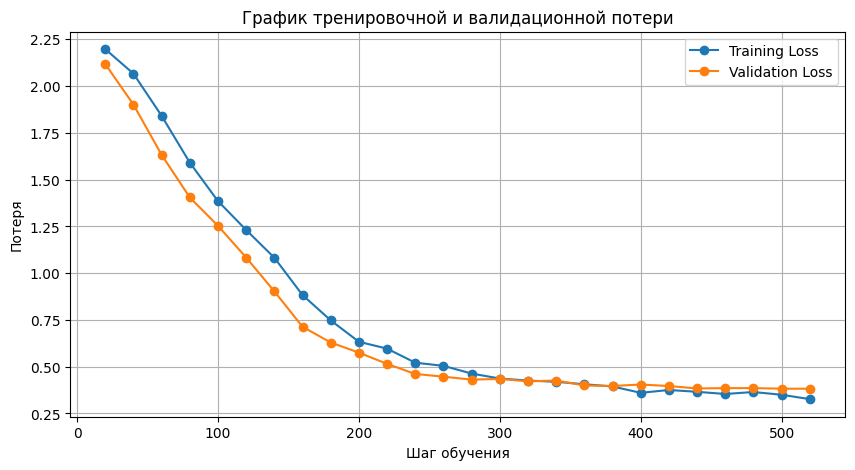

In [ ]:
# Извлекаем историю логирования
log_history = trainer.state.log_history

# Списки для тренировочной и валидационной потерь и соответствующих шагов
train_steps, train_losses = [], []
eval_steps, eval_losses = [], []

for entry in log_history:
    # Тренировочная потеря
    if "loss" in entry:
        # Используем шаг обучения, если он есть, иначе порядковый номер
        train_steps.append(entry.get("step", len(train_steps) + 1))
        train_losses.append(entry["loss"])
    # Валидационная потеря
    if "eval_loss" in entry:
        eval_steps.append(entry.get("step", len(eval_steps) + 1))
        eval_losses.append(entry["eval_loss"])

# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(train_steps, train_losses, marker="o", label="Training Loss")
plt.plot(eval_steps, eval_losses, marker="o", label="Validation Loss")
plt.xlabel("Шаг обучения")
plt.ylabel("Потеря")
plt.title("График тренировочной и валидационной потери")
plt.legend()
plt.grid(True)
plt.show()


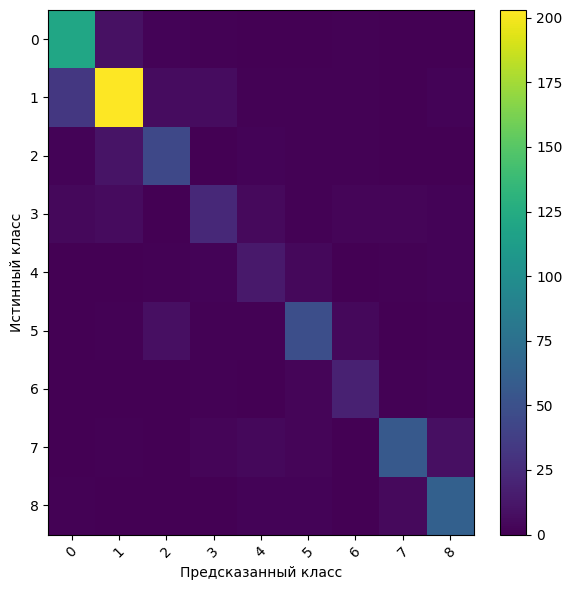

In [ ]:
cm = confusion_matrix(y_test,y_pred, labels=np.unique(y_test))

fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(cm, interpolation='nearest', aspect='auto')
unique_labels = np.unique(y_test).astype(int)
ax.set_xticks(range(9))
ax.set_yticks(range(9))
ax.set_xticklabels(unique_labels, rotation=45)
ax.set_yticklabels(unique_labels)
ax.set_ylabel('Истинный класс')
ax.set_xlabel('Предсказанный класс')
fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

In [ ]:
# Сначала получим список всех классов
classes = np.unique(y_test)

# 1) F1-score по классам
f1_per_class = f1_score(y_test, y_pred, labels=classes, average=None, zero_division=0)

# 2) «Точность по классу» как доля правильно предсказанных среди всех примеров этого класса
#    (этот показатель в мультиклассе эквивалентен recall для данного класса)
accuracy_per_class = np.array([
    np.mean(y_pred[y_test == cls] == cls)
    for cls in classes
])

# 3) Собираем всё в DataFrame
df = pd.DataFrame({
    'class': classes.astype(str),
    'accuracy': accuracy_per_class,
    'f1_score': f1_per_class
}).set_index('class')

print(df)

       accuracy  f1_score
class                    
0      0.902256  0.819113
1      0.796078  0.835391
2      0.721311  0.715447
3      0.489362  0.541176
4      0.583333  0.528302
5      0.753846  0.759690
6      0.730769  0.690909
7      0.750000  0.797203
8      0.861111  0.821192


# Частичное обучение

In [23]:
for name, param in model.roberta.named_parameters():
  if 'encoder.layer.' in name:
      layer_num = int(name.split('.')[2])
      if layer_num >= (model.config.num_hidden_layers - 2):
          param.requires_grad = True
      else:
          param.requires_grad = False

In [ ]:
model

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=Tru

In [24]:
training_args1 = TrainingArguments(
    output_dir="checkpoints/",
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    eval_accumulation_steps=20,
    learning_rate=1e-5,
	  num_train_epochs=45,
    logging_strategy="steps",
    logging_steps=100,
    evaluation_strategy="steps",
    save_strategy="steps",
    save_total_limit=2,
    load_best_model_at_end=True,
    optim="adamw_torch",
    metric_for_best_model="f1",
    report_to="tensorboard",
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [25]:
trainer = Trainer(
    model=model,
    args=training_args1,
    train_dataset=CustomDataset(X_train, y_train, tokenizer=tokenizer),
    eval_dataset=CustomDataset(X_val, y_val, tokenizer=tokenizer),
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(3, 0.0)]
)

In [27]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1
100,1.878400,1.463662,0.466568,0.441649
200,1.368700,1.003197,0.649331,0.645166
300,0.921000,0.616804,0.783061,0.779698
400,0.620900,0.483958,0.827637,0.828145
500,0.492800,0.428622,0.860327,0.860131
600,0.421400,0.405629,0.878158,0.878223
700,0.367000,0.385322,0.879643,0.879674
800,0.336900,0.382778,0.873700,0.873760
900,0.302200,0.368302,0.881129,0.881233
1000,0.301200,0.364872,0.882615,0.882939


TrainOutput(global_step=1890, training_loss=0.48104866673706703, metrics={'train_runtime': 5392.9084, 'train_samples_per_second': 22.429, 'train_steps_per_second': 0.35, 'total_flos': 1.1272908386009088e+17, 'train_loss': 0.48104866673706703, 'epoch': 45.0})

In [28]:
test1 = trainer.predict(CustomDataset(X_test, y_test, tokenizer=tokenizer))

In [29]:
print(test1[2])

{'test_loss': 0.7418832182884216, 'test_accuracy': 0.8063241106719368, 'test_f1': 0.8086228413534781, 'test_runtime': 14.6014, 'test_samples_per_second': 51.981, 'test_steps_per_second': 0.822}


In [30]:
y_pred1 = np.argmax(test1[0],axis=1)

In [31]:
classes = np.unique(y_test)

# 1) F1-score по классам
f1_per_class = f1_score(y_test, y_pred1, labels=classes, average=None, zero_division=0)

# 2) «Точность по классу» как доля правильно предсказанных среди всех примеров этого класса
#    (этот показатель в мультиклассе эквивалентен recall для данного класса)
accuracy_per_class = np.array([
    np.mean(y_pred1[y_test == cls] == cls)
    for cls in classes
])

# 3) Собираем всё в DataFrame
df = pd.DataFrame({
    'class': classes.astype(str),
    'accuracy': accuracy_per_class,
    'f1_score': f1_per_class
}).set_index('class')

print(df)

       accuracy  f1_score
class                    
0      0.894737  0.832168
1      0.811765  0.857143
2      0.721311  0.721311
3      0.595745  0.565657
4      0.708333  0.618182
5      0.784615  0.809524
6      0.769231  0.769231
7      0.855263  0.844156
8      0.847222  0.865248
